In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

In [3]:
import scikitplot as skplt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
raw = pd.read_excel("default of credit card clients.xls", header = 1)
raw

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [6]:
X = raw.drop(["default payment next month", "ID"], axis = 1)
y = raw["default payment next month"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 0)

In [7]:
def ROC_graph(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    ax = sns.lineplot(x = fpr, y = tpr)
    ax.set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate', title= 'ROC curve')
    print("Area ratio:", roc_auc_score(y_test, y_pred))
    return(roc_auc_score(y_test, y_pred))

In [8]:
roc_ratios = []

## SSM

In [9]:
def SSM(n, y_pred, y_test):
    data = []
    for i in range(len(y_pred)):
        data.append([y_pred[i],y_test.values[i]])
    data.sort(key = lambda x: x[0])
    # Sorting Smoothing Method
    def get_SSM(n, data, col):
        probs = []
        for i in range(len(data)):
            p = 0.0
            cnt = 0
            use = True
            for j in range(n):
                if i-j >= 0:
                    p += data[i-j][col]
                    cnt += 1
                else:
                    use = False
                if i+j < len(data):
                    p += data[i+j][col]
                    cnt += 1
                else:
                    use = False
            if(use):
                probs.append(p/(cnt+1))

        return probs

    # calculate actual probility
    probs_pred = get_SSM(n, data, 0)
    probs_actual = get_SSM(n, data, 1)

    plt.plot(probs_pred, probs_actual, "o")
    plt.xlabel("Predicted probability")
    plt.ylabel("Actual probability")
    plt.title("R^2 = %f"%r2_score(probs_actual, probs_pred))
    plt.show()

## KNN

In [10]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
knn_pred = neigh.predict(X_test)
knn_proba = neigh.predict_proba(X_test)

In [11]:
skplt.metrics.plot_cumulative_gain(y_test, knn_proba)

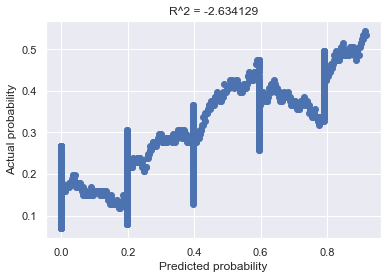

In [12]:
SSM(50, knn_proba[:,1], y_test)

In [12]:
1 - neigh.score(X_test, y_test)

0.246

Area ratio: 0.5491262220601177


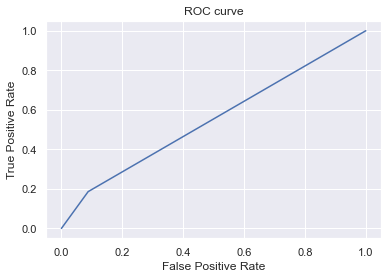

In [89]:
roc_ratios.append(ROC_graph(y_test, knn_pred))

## Logistic

In [42]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
log_pred = clf.predict(X_test)
log_proba = clf.predict_proba(X_test)
1 - clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.2178

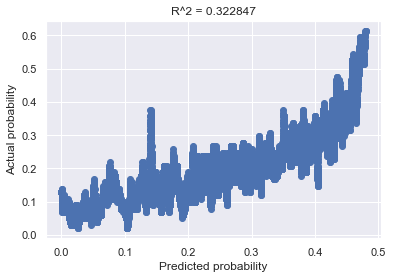

In [46]:
SSM(50, log_proba[:,1], y_test)

In [88]:
skplt.metrics.plot_cumulative_gain(y_test, log_proba)

In [258]:
roc_ratios.append(ROC_graph(y_test, log_pred))

Area ratio: 0.5001529987760098


## Discriminant Analysis

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
clf2 = LinearDiscriminantAnalysis().fit(X_train, y_train)
da_pred = clf2.predict(X_test)
da_proba = clf2.predict_proba(X_test)
1 - clf2.score(X_test, y_test)

0.18466666666666665

In [48]:
SSM(50, da_proba[:,1], y_test)

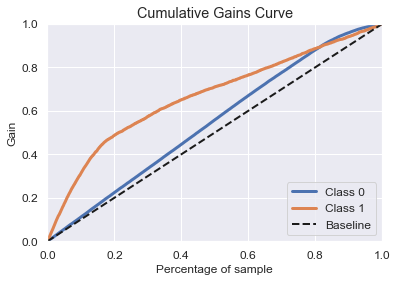

In [93]:
skplt.metrics.plot_cumulative_gain(y_test, da_proba)

In [261]:
roc_ratios.append(ROC_graph(y_test, da_pred))

Area ratio: 0.6105216627070256


## Naive Bayesian classifier

In [49]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train, y_train)
nb_pred = model.predict(X_test)
nb_proba = model.predict_proba(X_test)
1 - model.score(X_test, y_test)

0.6391333333333333

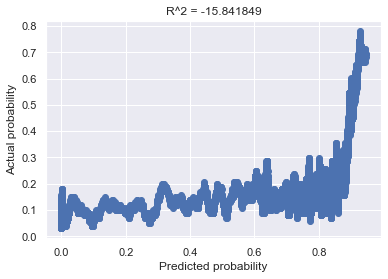

In [54]:
SSM(50, nb_proba[:,1], y_test)

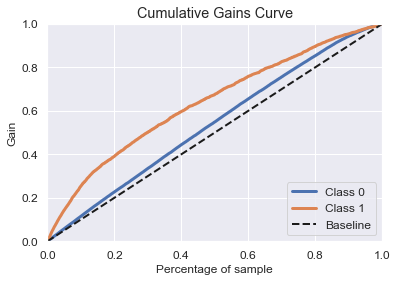

In [97]:
skplt.metrics.plot_cumulative_gain(y_test, nb_proba)

Area ratio: 0.558081788669932


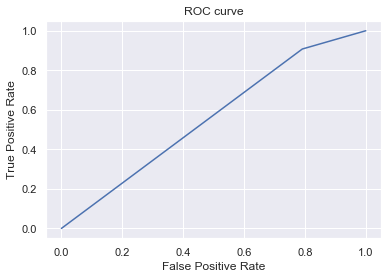

In [263]:
roc_ratios.append(ROC_graph(y_test, nb_pred))

## Classification Tree (Decision Tree)

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)
1 - dt.score(X_test, y_test)

0.2764

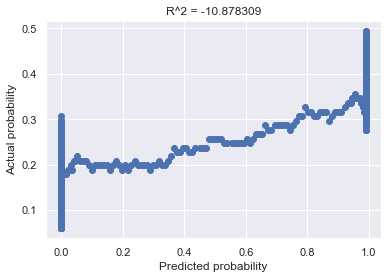

In [60]:
SSM(50, dt_proba[:,1], y_test)

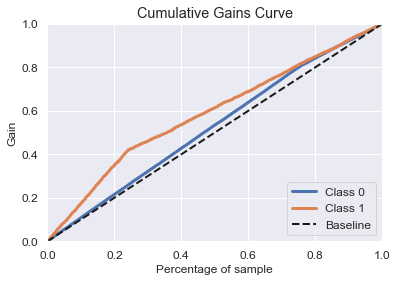

In [99]:
skplt.metrics.plot_cumulative_gain(y_test, dt_proba)

Area ratio: 0.6138019815036843


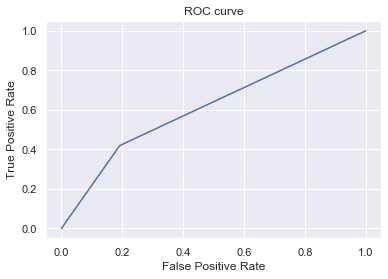

In [265]:
roc_ratios.append(ROC_graph(y_test, dt_pred))

In [23]:
modelnames = ["KNN", "Logistic regression", "Discriminent analysis", "Naive bayesian", "Decision Tree"]
roc = pd.DataFrame([modelnames, roc_ratios])
roc = roc.T
roc.columns = ["name", "roc_ratio"]
roc

name roc_ratio
0                    KNN      None
1    Logistic regression      None
2  Discriminent analysis      None
3         Naive bayesian      None
4          Decision Tree      None

# Improveing performance
## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)
1 - rf.score(X_test, y_test)

0.18066666666666664

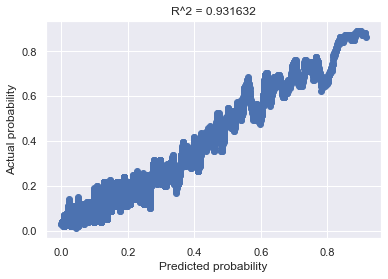

In [62]:
SSM(50, rf_proba[:,1], y_test)

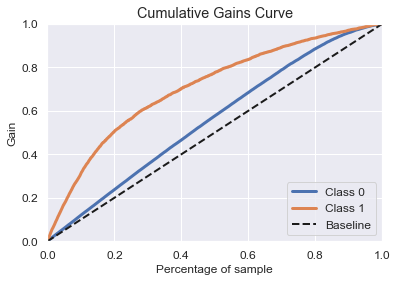

In [103]:
skplt.metrics.plot_cumulative_gain(y_test, rf_proba)

In [268]:
ROC_graph(y_test, rf_pred)

Area ratio: 0.6580035522006994


0.6580035522006994

In [63]:
raw2 = pd.concat([raw, pd.get_dummies(raw['SEX'], prefix = "SEX"), 
pd.get_dummies(raw['EDUCATION'], prefix = "EDUCATION"), pd.get_dummies(raw['MARRIAGE'], prefix = "MARRIAGE")], axis = 1)
raw2 = raw2.drop(["EDUCATION", 'MARRIAGE', 'SEX'], axis = 1)
raw2

ID  LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0          1      20000   24      2      2     -1     -1     -2     -2   
1          2     120000   26     -1      2      0      0      0      2   
2          3      90000   34      0      0      0      0      0      0   
3          4      50000   37      0      0      0      0      0      0   
4          5      50000   57     -1      0     -1      0      0      0   
...      ...        ...  ...    ...    ...    ...    ...    ...    ...   
29995  29996     220000   39      0      0      0      0      0      0   
29996  29997     150000   43     -1     -1     -1     -1      0      0   
29997  29998      30000   37      4      3      2     -1      0      0   
29998  29999      80000   41      1     -1      0      0      0     -1   
29999  30000      50000   46      0      0      0      0      0      0   

       BILL_AMT1  ...  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0           3913  ...            0            1            0            0   
1           2682  ...            0            1            0            0   
2          29239  ...            0            1            0            0   
3          46990  ...            0            1            0            0   
4           8617  ...            0            1            0            0   
...          ...  ...          ...          ...          ...          ...   
29995     188948  ...            0            0            1            0   
29996       1683  ...            0            0            1            0   
29997       3565  ...            0            1            0            0   
29998      -1645  ...            0            0            1            0   
29999      47929  ...            0            1            0            0   

       EDUCATION_5  EDUCATION_6  MARRIAGE_0  MARRIAGE_1  MARRIAGE_2  \
0                0            0           0           1           0   
1                0            0           0           0           1   
2                0            0           0           0           1   
3                0            0           0           1           0   
4                0            0           0           1           0   
...            ...          ...         ...         ...         ...   
29995            0            0           0           1           0   
29996            0            0           0           0           1   
29997            0            0           0           0           1   
29998            0            0           0           1           0   
29999            0            0           0           1           0   

       MARRIAGE_3  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
29995           0  
29996           0  
29997           0  
29998           0  
29999           0  

[30000 rows x 35 columns]

In [64]:
X2 = raw2.drop(["default payment next month", "ID"], axis = 1)
y2 = raw2["default payment next month"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.5, random_state = 0)

In [65]:
rf = RandomForestClassifier(random_state=0).fit(X_train2, y_train2)
rf_pred = rf.predict(X_test2)
rf_proba = rf.predict_proba(X_test2)
1 - rf.score(X_test2, y_test2)

0.18186666666666662

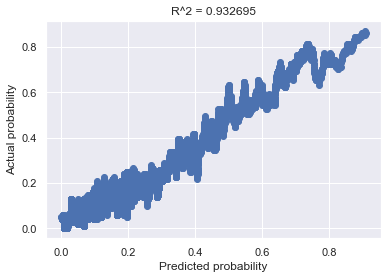

In [66]:
SSM(50, rf_proba[:,1], y_test)

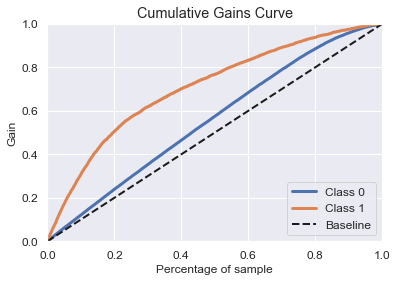

In [107]:
skplt.metrics.plot_cumulative_gain(y_test, rf_proba)

Area ratio: 0.6545872924527003


0.6545872924527003

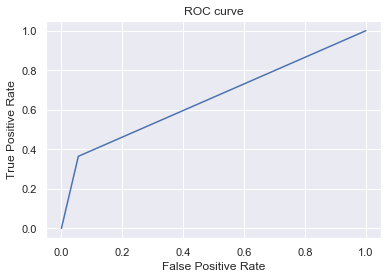

In [272]:
ROC_graph(y_test2, rf_pred)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train2)
X_test_std = scaler.transform(X_test2)

In [68]:
rf = RandomForestClassifier(random_state=0).fit(X_train_std, y_train2)
rf_pred = rf.predict(X_test_std)
rf_proba = rf.predict_proba(X_test_std)
1 - rf.score(X_test_std, y_test2)

0.18179999999999996

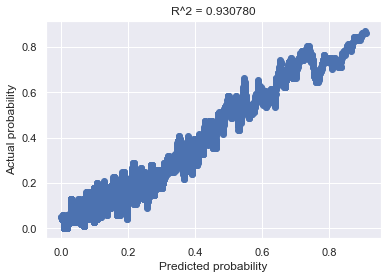

In [69]:
SSM(50, rf_proba[:,1], y_test)

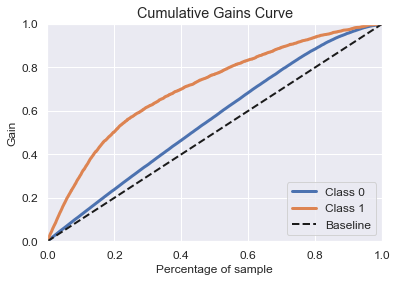

In [110]:
skplt.metrics.plot_cumulative_gain(y_test, rf_proba)

Area ratio: 0.65474029122871


0.65474029122871

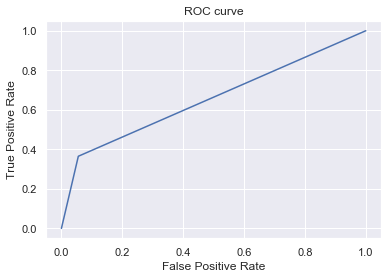

In [275]:
ROC_graph(y_test2, rf_pred)

In [71]:
from sklearn import svm

In [73]:
svc = svm.SVC(probability=True).fit(X_train_std, y_train2)
svm_pred = svc.predict(X_test_std)
svm_proba = svc.predict_proba(X_test_std)
1 - svc.score(X_test_std, y_test2)

0.17659999999999998

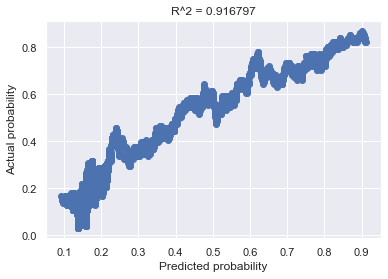

In [74]:
SSM(50, svm_proba[:,1], y_test)

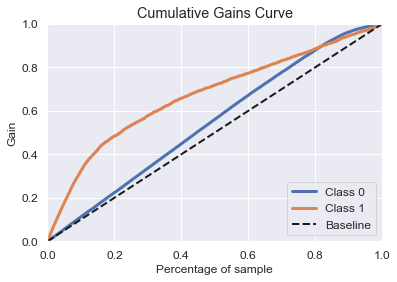

In [117]:
skplt.metrics.plot_cumulative_gain(y_test, svm_proba)

Area ratio: 0.6452604182098696


0.6452604182098696

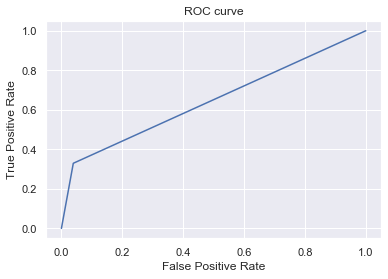

In [285]:
ROC_graph(y_test2, svm_pred)